In [124]:
import shutil
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
#from keras.layers.convolutional import Convolution2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
import numpy as np
import matplotlib.pyplot as plt
import keras.preprocessing.image as kim
from shutil import copyfile
from scipy.misc import imsave,imresize, imread
import pandas as pd


In [148]:
image_height = 128
image_width = 128
samples_per_epoch = 128
validation_steps = 4
no_of_classes = 30
epochs=20
batch_size=64
train_data_path='pretrained_test/augmented_train_final1/'
validation_data_path='pretrained_valid/augmented_valid_final/'
#top_model_weights_path=r'/C:\Users\pooja\AnacondaProjects\ML project\vggvgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [149]:

model = applications.VGG16(weights='imagenet', include_top=False,input_shape = (128,128,3))


In [150]:
type(model)

keras.engine.training.Model

In [151]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [152]:
top_model = Sequential()
top_model.add(model)
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(512, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(30, activation='softmax'))

In [153]:
#top_model.load_weights(top_model_weights_path)

In [154]:
for layer in model.layers[:19]:
    layer.trainable = False

In [155]:

train_images = ImageDataGenerator(
    rescale=1. / 255)

validate_images = ImageDataGenerator(rescale=1. / 255)

train_generator = train_images.flow_from_directory(
    train_data_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validate_images.flow_from_directory(
    validation_data_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 409 images belonging to 30 classes.
Found 143 images belonging to 30 classes.


In [156]:
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 30)                15390     
Total params: 18,924,894
Trainable params: 4,210,206
Non-trainable params: 14,714,688
_________________________________________________________________


In [157]:
top_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])


In [158]:
history=top_model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=20,
    validation_data=validation_generator,
   #callbacks=[tensorboard],
    validation_steps=validation_steps
)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=2, validation_steps=4, validation_data=<keras.pre..., epochs=20)`
  import sys


Epoch 1/20
2/2 [==============================] - 51s 25s/step - loss: 6.7399 - acc: 0.0358 - val_loss: 6.3781 - val_acc: 0.0338
Epoch 2/20
2/2 [==============================] - 57s 29s/step - loss: 8.7021 - acc: 0.0547 - val_loss: 4.6358 - val_acc: 0.0773
Epoch 3/20
2/2 [==============================] - 57s 29s/step - loss: 6.2239 - acc: 0.0859 - val_loss: 4.0742 - val_acc: 0.0628
Epoch 4/20
2/2 [==============================] - 51s 25s/step - loss: 5.0649 - acc: 0.0358 - val_loss: 3.3736 - val_acc: 0.1643
Epoch 5/20
2/2 [==============================] - 57s 29s/step - loss: 3.7732 - acc: 0.0781 - val_loss: 2.9665 - val_acc: 0.1981
Epoch 6/20
2/2 [==============================] - 57s 29s/step - loss: 3.0603 - acc: 0.1953 - val_loss: 3.0280 - val_acc: 0.1787
Epoch 7/20
2/2 [==============================] - 58s 29s/step - loss: 2.7908 - acc: 0.2656 - val_loss: 2.8963 - val_acc: 0.1836
Epoch 8/20
2/2 [==============================] - 58s 29s/step - loss: 2.4898 - acc: 0.2734 - val

In [118]:
keras.callbacks.History()

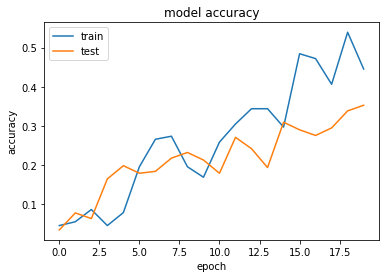

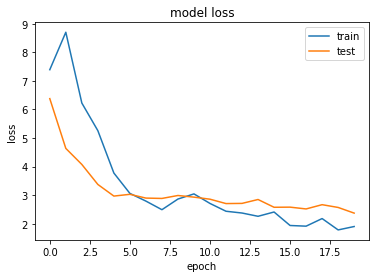

In [159]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()